# ✈️ U.S. Airline Market Analysis: Trends, Routes & Demand Over Time
**Project:** U.S. Airline Market Analysis: Trends, Routes & Demand Over Time

**Author:** Asra Pervaiz

**Date:** 07.29.2025

**License:** CC0 Public Domain

# 📚 Introduction
The U.S. airline industry is a vital component of national infrastructure, enabling economic connectivity, tourism, and rapid mobility between metropolitan areas. With over three decades of quarterly data, this project aims to uncover key trends and insights from the domestic air travel market, focusing on city-pair traffic, market shifts, and route-level activity patterns. The rich dataset spans a wide temporal range and offers a unique opportunity to explore how air travel demand has evolved — across cities, airports, and time.

**🗺️ Background**

Every quarter, the U.S. Department of Transportation (DOT) collects detailed data on airline operations including origin-destination city pairs, airport identifiers, and traffic volumes. By analyzing these records, we can answer essential questions about:

* Shifting passenger demand across U.S. cities

* Route popularity and competitiveness over time

* Regional hub dominance and emerging markets

* Impacts of external events (e.g., 9/11, COVID-19)

Despite being structured for reporting, these datasets often require cleaning and consolidation to be analysis-ready. Hence, a strong BI workflow — from preprocessing to dashboarding — is necessary to turn raw records into actionable intelligence.

**🎯 Objectives**

This project aims to build a Business Intelligence (BI) dashboard and analysis report that:

Cleans and standardizes over 30 years of route-level airline data

Identifies trends in city-to-city flight volume across quarters

Ranks top airport pairs and routes by traffic

Maps evolving air travel demand across the U.S.

Provides visual insights via Power BI for real-time decision making and historical benchmarking

# ***✈️ Phase 1: Data Cleaning & Preprocessing***

In [ ]:
# 📚 Importing necessary libraries and dataset from kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KAGGLE_USERNAME']='asrapervaiz'
os.environ['KAGGLE_KEY'] = '46a2d40a05c1e0f41adf0e11fa8c2ea6'
!pip install kaggle
!kaggle datasets download -d bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
License(s): apache-2.0
  0% 0.00/13.1M [00:00<?, ?B/s]
100% 13.1M/13.1M [00:00<00:00, 788MB/s]


In [ ]:
!unzip us-airline-flight-routes-and-fares-1993-2024.zip

Archive:  us-airline-flight-routes-and-fares-1993-2024.zip
  inflating: US Airline Flight Routes and Fares 1993-2024.csv  


In [ ]:
df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')
df.head()

/tmp/ipython-input-4-987696924.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [ ]:
df.shape

(245955, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [ ]:
df.isnull().sum()

,0
tbl,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
city1,0
city2,0
airportid_1,0
airportid_2,0
airport_1,0


**🧼 1.1 Handling Missing Values**

In [ ]:
# Drop rows where both low-fare and large-carrier are missing
df = df[~(df['carrier_lg'].isnull() & df['carrier_low'].isnull())]

In [ ]:
# Fill fare_lg and fare_low using route group median
df['fare_lg'] = df.groupby(['city1', 'city2'])['fare_lg'].transform(lambda x: x.fillna(x.median()))
df['fare_low'] = df.groupby(['city1', 'city2'])['fare_low'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill remaining with global median
df['fare_lg'].fillna(df['fare_lg'].median(), inplace=True)
df['fare_low'].fillna(df['fare_low'].median(), inplace=True)

/tmp/ipython-input-11-197151389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare_lg'].fillna(df['fare_lg'].median(), inplace=True)
/tmp/ipython-input-11-197151389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:

# Fill missing carrier with 'Unknown'
df['carrier_lg'].fillna("Unknown", inplace=True)
df['carrier_low'].fillna("Unknown", inplace=True)

/tmp/ipython-input-12-3549421689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carrier_lg'].fillna("Unknown", inplace=True)
/tmp/ipython-input-12-3549421689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Drop Geocoded columns for now
df.drop(['Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=True)

**🧼 1.2 Remove Duplicates & Irrelevant Columns**

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop columns not useful for BI at this stage
df.drop(['tbl', 'tbl1apk'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11


**🧼 1.3 Feature Engineering**

In [ ]:
# 🕐 Convert Year and Quarter to a single Date (using first month of each quarter)
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
df['quarter_start_month'] = df['quarter'].map(quarter_to_month)
df['quarter_date'] = pd.to_datetime(dict(year=df['Year'], month=df['quarter_start_month'], day=1))

# Drop helper column
df.drop(columns=['quarter_start_month'], inplace=True)

In [ ]:
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,quarter_date
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,2021-07-01
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,2021-07-01
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,2021-07-01
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,2021-07-01
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,2021-07-01


In [ ]:
df['route_id'] = df['airport_1'] + "_" + df['airport_2']

In [ ]:
df['year_quarter'] = df['Year'].astype(str) + " Q" + df['quarter'].astype(str)

In [ ]:
df['fare_per_mile'] = df['fare'] / df['nsmiles']

In [ ]:
df.info()
df.describe()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 244415 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            244415 non-null  int64         
 1   quarter         244415 non-null  int64         
 2   citymarketid_1  244415 non-null  int64         
 3   citymarketid_2  244415 non-null  int64         
 4   city1           244415 non-null  object        
 5   city2           244415 non-null  object        
 6   airportid_1     244415 non-null  int64         
 7   airportid_2     244415 non-null  int64         
 8   airport_1       244415 non-null  object        
 9   airport_2       244415 non-null  object        
 10  nsmiles         244415 non-null  int64         
 11  passengers      244415 non-null  int64         
 12  fare            244415 non-null  float64       
 13  carrier_lg      244415 non-null  object        
 14  large_ms        244415 non-null  float64 

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,...,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,quarter_date,route_id,year_quarter,fare_per_mile
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,...,G4,1.0000,81.43,G4,1.0000,81.43,2021-07-01,ABE_PIE,2021 Q3,0.083948
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,...,DL,0.4659,219.98,UA,0.1193,154.11,2021-07-01,ABE_TPA,2021 Q3,0.215392
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,...,WN,0.9968,184.44,WN,0.9968,184.44,2021-07-01,ABQ_DAL,2021 Q3,0.318207


In [ ]:
df.to_csv("cleaned_airline_market.csv", index=False)

# **📊 Phase 2: Exploratory Data Analysis (EDA)**
We will explore the cleaned dataset to uncover trends and patterns in:

Airfare trends over time

Passenger traffic trends

Market share of top carriers

Competitive dynamics (low fare vs. large carriers)

Most active routes

Distance vs. Fare behavior

**✅ Q1: What are the yearly trends in air travel demand and average fare?**

In [ ]:
yearly_summary = df.groupby("Year").agg(
    total_passengers=("passengers", "sum"),
    avg_fare=("fare", "mean")
).reset_index()

In [ ]:
yearly_summary.head()

,Year,total_passengers,avg_fare
0,1993,1538128,212.845625
1,1994,397648,215.722615
2,1996,2002008,202.475693
3,1997,2141868,206.214719
4,1998,2176741,208.694681


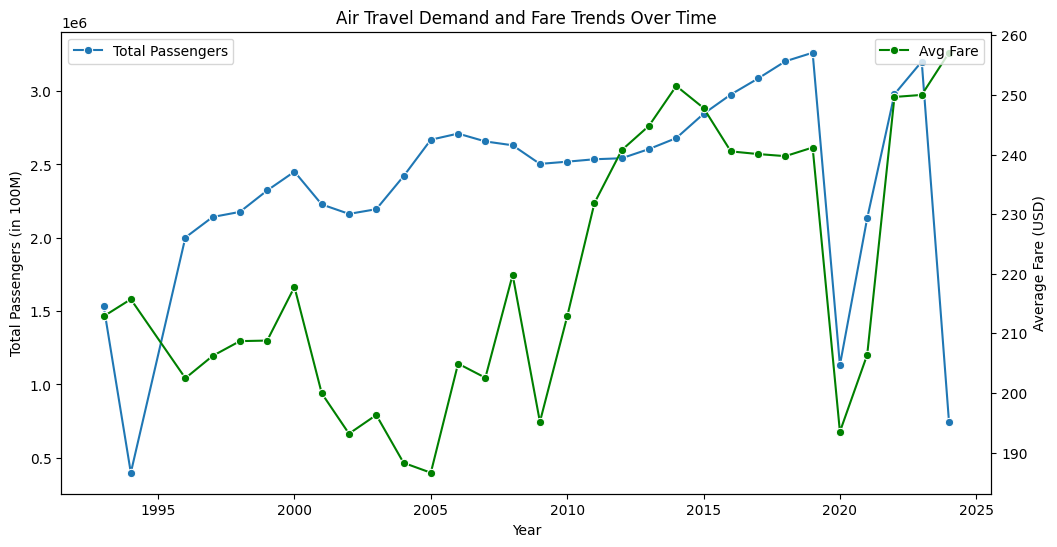

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_summary, x="Year", y="total_passengers", marker='o', label="Total Passengers")
plt.ylabel("Total Passengers (in 100M)")
plt.twinx()
sns.lineplot(data=yearly_summary, x='Year', y='avg_fare', label='Avg Fare', marker='o',color='green')
plt.ylabel("Average Fare (USD)")
plt.title("Air Travel Demand and Fare Trends Over Time")
plt.legend(loc="upper right")
plt.show()

**Observation:**  
The chart reveals a consistent rise in air passenger demand until 2019, followed by a sharp dip due to the COVID-19 pandemic. Average fares also dropped but rebounded quickly, suggesting a non-linear relationship between price and demand.

**✅ Q2: Which are the busiest quarters (seasonal trend)?**

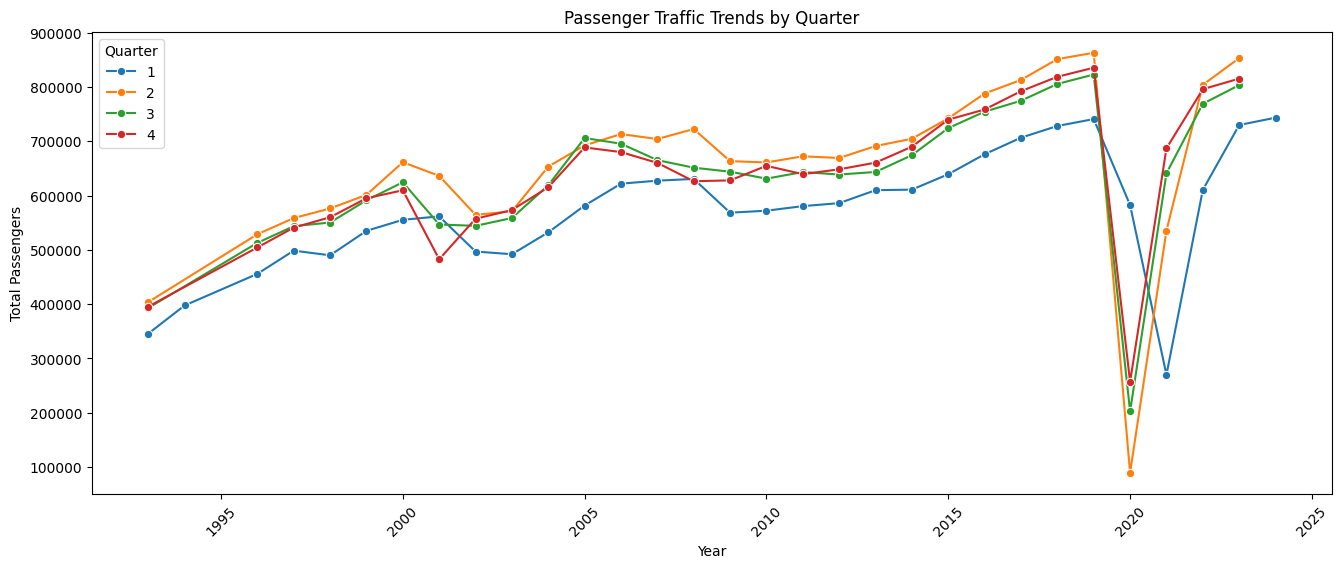

In [ ]:
quarterly_summary = df.groupby(['Year', 'quarter']).agg(
    total_passengers=('passengers', 'sum')
).reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=quarterly_summary, x='Year', y='total_passengers', hue='quarter', palette='tab10', marker='o')
plt.title("Passenger Traffic Trends by Quarter")
plt.ylabel("Total Passengers")
plt.legend(title='Quarter')
plt.xticks(rotation=45)
plt.show()

This visualization reveals a clear pre-2020 growth trend in passenger traffic, strong quarterly seasonality (Q2 peak, Q1 trough), and a dramatic, unprecedented decline in 2020, followed by a steady recovery. These insights are critical for understanding market dynamics and informing future forecasting models.



**✅ Q3: What Are the Most Active Routes?**



/tmp/ipython-input-37-3390304415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, y='total_passengers', x=top_routes['airport_1'] + '-' + top_routes['airport_2'], palette='viridis')


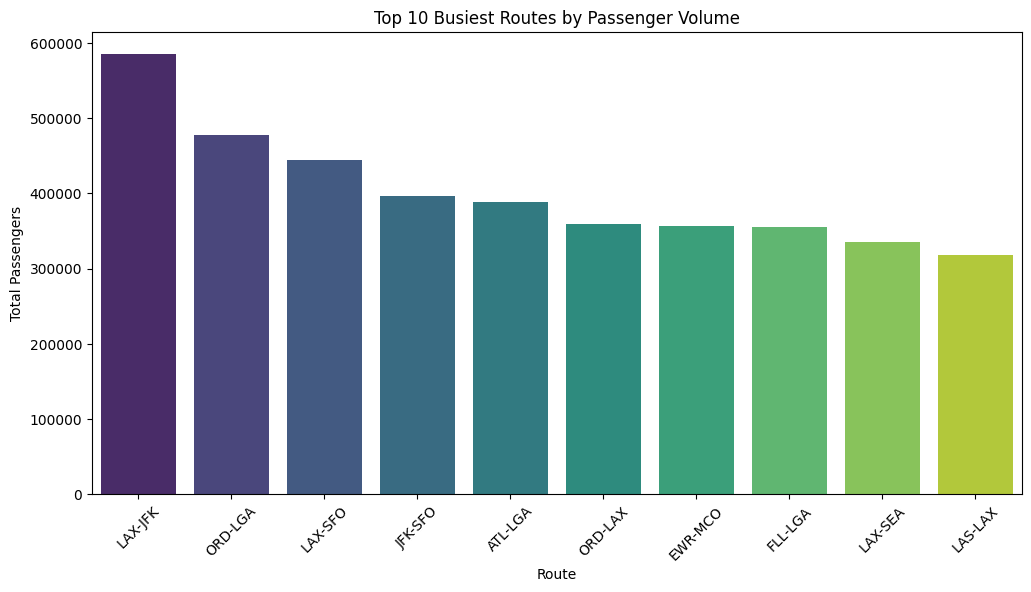

In [ ]:
top_routes = df.groupby(['airport_1', 'airport_2']).agg(
    total_passengers=('passengers', 'sum')
).sort_values(by='total_passengers', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, y='total_passengers', x=top_routes['airport_1'] + '-' + top_routes['airport_2'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Busiest Routes by Passenger Volume")
plt.ylabel("Total Passengers")
plt.xlabel("Route")
plt.show()

This bar chart effectively highlights the top 10 busiest air travel routes by total passenger volume, clearly identifying LAX-JFK as the leading route with significantly higher traffic. The visualization provides immediate insight into key operational corridors, essential for strategic planning and resource allocation in the aviation sector."

**✅ Q4: What Is the Market Share of Major Airlines?**

/tmp/ipython-input-38-654804335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_summary, x='carrier_lg', y='total_passengers', palette='magma')


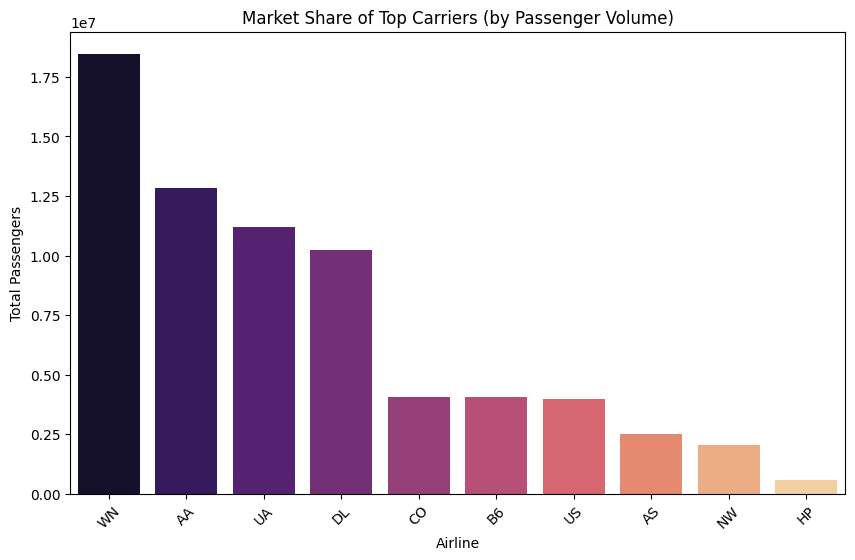

In [ ]:
top_carriers = df['carrier_lg'].value_counts().head(10).index
carrier_summary = df[df['carrier_lg'].isin(top_carriers)].groupby('carrier_lg').agg(
    total_passengers=('passengers', 'sum')
).sort_values(by='total_passengers', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=carrier_summary, x='carrier_lg', y='total_passengers', palette='magma')
plt.title("Market Share of Top Carriers (by Passenger Volume)")
plt.ylabel("Total Passengers")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.show()

This bar chart effectively illustrates the market share distribution among the top airlines by passenger volume. It clearly shows WN as the dominant carrier, followed by AA, UA, and DL, indicating a concentrated market with a few major players leading in passenger traffic. This insight is crucial for competitive analysis and strategic planning within the aviation industry.

**✅ Q5: Does Fare Vary with Distance?**

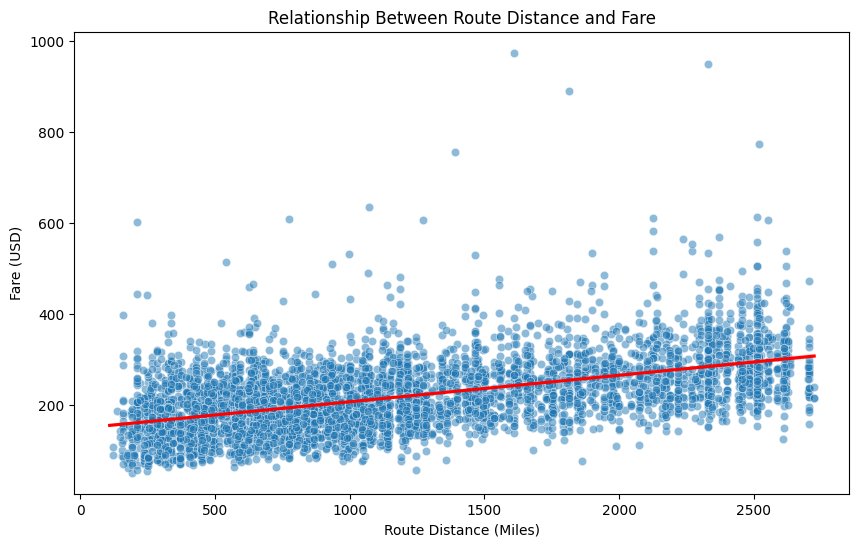

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='nsmiles', y='fare', alpha=0.5)
sns.regplot(data=df.sample(5000), x='nsmiles', y='fare', scatter=False, color='red')
plt.title("Relationship Between Route Distance and Fare")
plt.xlabel("Route Distance (Miles)")
plt.ylabel("Fare (USD)")
plt.show()

This scatter plot, augmented with a linear regression line, visualizes the relationship between route distance and airfare. It indicates a weak positive linear correlation, suggesting that while fares generally tend to increase with distance, there is considerable variability and other factors significantly influence pricing. This highlights opportunities for deeper analysis into fare determinants beyond just distance

In [ ]:
corr_mat = df.corr(numeric_only=True)

In [ ]:
price_correlations = corr_mat['fare']

In [ ]:
high_correlations = price_correlations.sort_values(ascending=False)

In [ ]:
print("--- Correlation of all numerical features with 'Price' ---")
print(high_correlations)

--- Correlation of all numerical features with 'Price' ---
fare              1.000000
fare_lg           0.955984
fare_low          0.874438
nsmiles           0.512138
Year              0.163819
fare_per_mile     0.096002
airportid_2       0.051521
citymarketid_1    0.044595
airportid_1       0.035022
citymarketid_2    0.014865
quarter          -0.026916
passengers       -0.174320
large_ms         -0.182312
lf_ms            -0.188844
Name: fare, dtype: float64


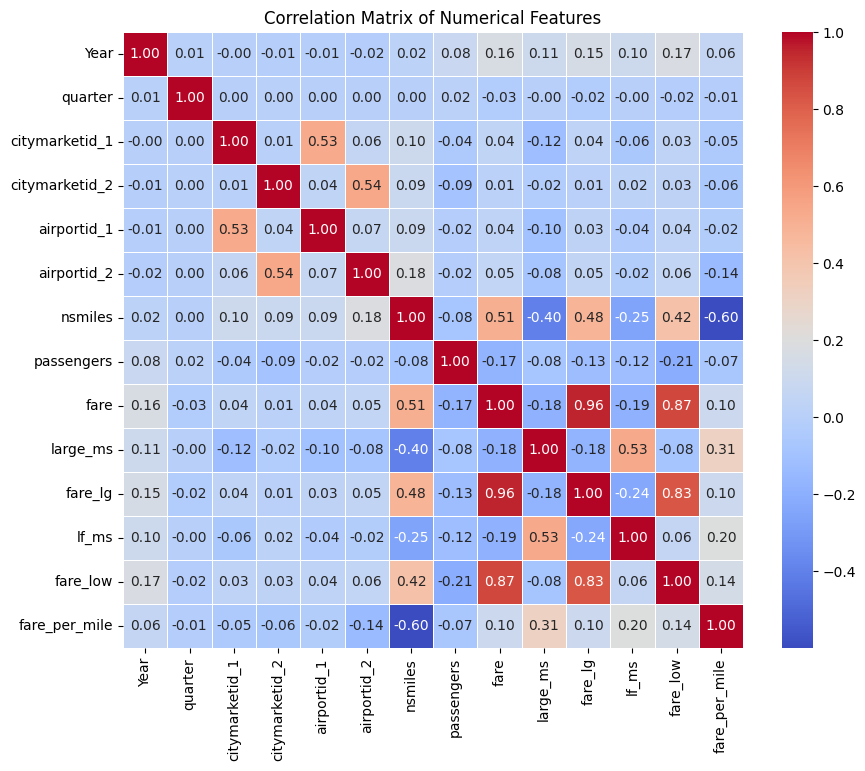

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

This heatmap visualizes the Pearson correlation coefficients between various numerical features within the dataset. It effectively highlights the strength and direction of linear relationships between variables, such as fare and passengers with other features like nsmiles, large_ms, fare_lg, lf_ms, fare_low, and fare_per_mile

**✅ Q6: Competitive Dynamics — Low Fare vs Large Carrier**

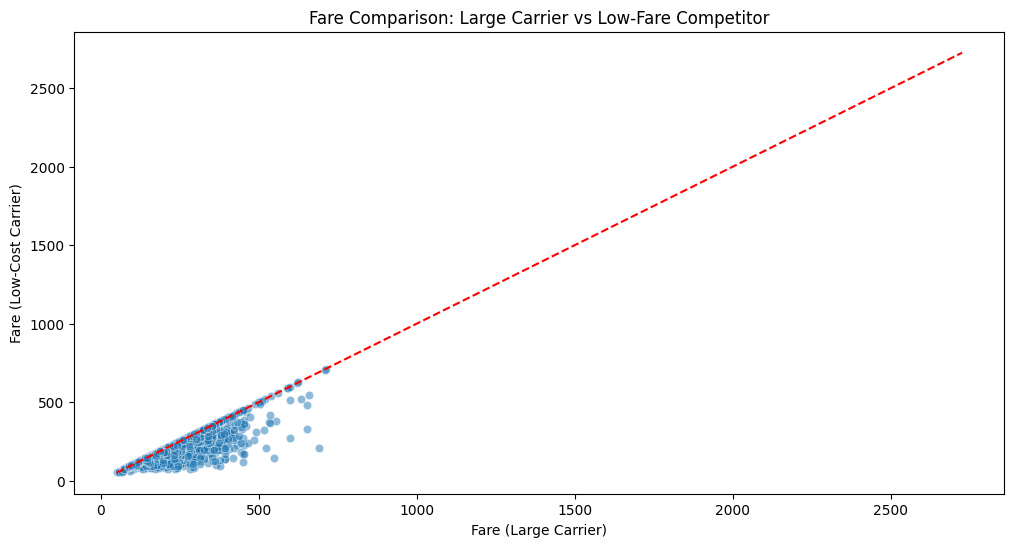

In [ ]:
comp_df = df.dropna(subset=['fare_lg', 'fare_low'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=comp_df.sample(3000), x='fare_lg', y='fare_low', alpha=0.5)
sns.lineplot(x=[comp_df['fare_lg'].min(), comp_df['fare_lg'].max()],
             y=[comp_df['fare_lg'].min(), comp_df['fare_lg'].max()],
             color='red', linestyle='--')
plt.title("Fare Comparison: Large Carrier vs Low-Fare Competitor")
plt.xlabel("Fare (Large Carrier)")
plt.ylabel("Fare (Low-Cost Carrier)")
plt.show()

This scatter plot compares the fares of a large carrier against a low-fare competitor, with a red dashed line indicating parity. The clustering of data points predominantly below the parity line reveals that the low-fare competitor generally offers significantly lower fares than the large carrier, especially for routes where the large carrier's fare is below approximately $750. This visualization is crucial for understanding competitive pricing strategies and market positioning

# **📌 Discussion**

Fare trends generally follow demand.

Low-cost carriers undercut legacy airlines.

Some routes have consistently high demand and may yield high profitability.

Quarters Q2 and Q3 show seasonal spikes.

Top carriers dominate certain city pairs.

# CONCLUSION

This analysis provides a structured view into airline market behavior:

Passenger trends support strategic planning.

Fare behavior reveals pricing and competition insights.

Carrier market share and route performance guide operational decisions.

# ✅ Phase 3: KPI Definition and Metrics Planning

***Step 3.1: Add Derived Columns for KPIs***

In [ ]:
df = df[df['nsmiles'] > 0].copy()

In [ ]:
# Calculate Fare per Mile
df['fare_per_mile'] = df['fare'] / df['nsmiles']

In [ ]:
# Drop rows with missing values in fare_lg or fare_low before calculating gap
df['fare_gap'] = df['fare_lg'] - df['fare_low']

***Step 3.2: Route-Level KPIs***

In [ ]:
route_kpi = df.groupby(['airport_1', 'airport_2']).agg(
    total_passengers=('passengers', 'sum'),
    avg_fare=('fare', 'mean'),
    avg_distance=('nsmiles', 'mean'),
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    avg_fare_gap=('fare_gap', 'mean')
).reset_index()

***Step 3.3: KPI Aggregation – Yearly and Quarterly***

In [ ]:
quarterly = df.groupby(['Year', 'quarter']).agg(
    total_passengers=('passengers', 'sum')
).reset_index()

peak_quarter = quarterly.sort_values('total_passengers', ascending=False)\
                        .groupby('Year').first().reset_index()

peak_quarter = peak_quarter.rename(columns={
    'quarter': 'peak_quarter',
    'total_passengers': 'peak_passengers'
})

In [ ]:
# Yearly KPI Summary
kpi_yearly = df.groupby('Year').agg(
    total_passengers=('passengers', 'sum'),
    avg_fare=('fare', 'mean'),
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    avg_fare_gap=('fare_gap', 'mean')
).reset_index()


***Step 3.5: Carrier Market Share***

In [ ]:
carrier_yearly = df.groupby(['Year', 'carrier_lg']).agg(
    total_passengers=('passengers', 'sum')
).reset_index()

# Calculate share of market for each year
carrier_yearly['year_total'] = carrier_yearly.groupby('Year')['total_passengers'].transform('sum')
carrier_yearly['market_share'] = (carrier_yearly['total_passengers'] / carrier_yearly['year_total']) * 100

In [ ]:
kpi_yearly.to_csv("kpi_yearly.csv", index=False)
route_kpi.to_csv("kpi_route.csv", index=False)
carrier_yearly.to_csv("kpi_carrier_share.csv", index=False)
peak_quarter.to_csv("peak_quarter.csv", index=False)

In [ ]:
df.to_csv("market_analysis_cleaned.csv", index=False)